In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:
# Define the cryptocurrencies to analyze
CRYPTO_LIST = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD',
               'ADA-USD', 'DOGE-USD', 'DOT-USD', 'SHIB-USD', 'AVAX-USD']

# Function to fetch data for multiple cryptos
def get_crypto_data(crypto_list, years=10):
    end = datetime.now()
    start = datetime(end.year - years, end.month, end.day)

    crypto_data = {}
    for crypto in crypto_list:
        data = yf.download(crypto, start=start, end=end)
        if not data.empty:
            crypto_data[crypto] = data
    return crypto_data

print("Downloading data...")
crypto_data = get_crypto_data(CRYPTO_LIST)
print(f"Downloaded {len(crypto_data)} cryptocurrencies")

# Display sample data for BTC-USD
crypto_data['BTC-USD'].head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded 10 cryptocurrencies


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2015-04-20,224.626007,226.350998,221.977005,222.612000,18364700
2015-04-21,235.268997,235.268997,224.300995,224.619995,24978000
2015-04-22,234.175995,237.908997,233.475998,235.602005,23847900
2015-04-23,236.462006,236.475006,233.199005,234.052994,17036000
2015-04-24,231.268005,236.304993,229.932999,235.970001,21448700


In [3]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=2a2bbb50ccbd4cbda1801f5294899313dc4a95dd5559ecde872e0796ee1b57ea
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [4]:
crypto_data['BTC-USD'].columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [5]:
# 1. First ensure proper column names in your data
for crypto in crypto_data:
    if isinstance(crypto_data[crypto].columns, pd.MultiIndex):
        crypto_data[crypto].columns = crypto_data[crypto].columns.droplevel(1)

# 2. Verify the columns look correct
print(crypto_data['DOGE-USD'])



Price          Close      High       Low      Open     Volume
Date                                                         
2017-11-09  0.001415  0.001415  0.001181  0.001207    6259550
2017-11-10  0.001163  0.001431  0.001125  0.001421    4246520
2017-11-11  0.001201  0.001257  0.001141  0.001146    2231080
2017-11-12  0.001038  0.001210  0.001002  0.001189    3288960
2017-11-13  0.001211  0.001212  0.001019  0.001046    2481270
...              ...       ...       ...       ...        ...
2025-04-16  0.154688  0.157003  0.150944  0.153547  823568608
2025-04-17  0.155740  0.159351  0.153181  0.154691  586169227
2025-04-18  0.157616  0.158770  0.153774  0.155741  477534244
2025-04-19  0.157333  0.160556  0.156523  0.157618  477710096
2025-04-20  0.154714  0.159283  0.153036  0.157325  555896448

[2720 rows x 5 columns]


In [6]:
# 3. Now add technical indicators
from ta import add_all_ta_features

for crypto in crypto_data:
    try:
        crypto_data[crypto] = add_all_ta_features(
            crypto_data[crypto],
            open="Open", high="High", low="Low",
            close="Close", volume="Volume",
            fillna=True
        )
        print(f"Successfully added indicators for {crypto}")
    except Exception as e:
        print(f"Failed for {crypto}: {str(e)}")
        # Drop problematic cryptos
        crypto_data.pop(crypto, None)

# 4. Check the results
print(crypto_data['BNB-USD'].columns.tolist()[:20])  # Show first 20 columns

/usr/local/lib/python3.11/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


Successfully added indicators for BTC-USD


/usr/local/lib/python3.11/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


Successfully added indicators for ETH-USD


/usr/local/lib/python3.11/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


Successfully added indicators for BNB-USD


/usr/local/lib/python3.11/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


Successfully added indicators for SOL-USD


/usr/local/lib/python3.11/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


Successfully added indicators for XRP-USD


/usr/local/lib/python3.11/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


Successfully added indicators for ADA-USD


/usr/local/lib/python3.11/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


Successfully added indicators for DOGE-USD


/usr/local/lib/python3.11/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


Successfully added indicators for DOT-USD


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Successfully added indicators for SHIB-USD


/usr/local/lib/python3.11/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


Successfully added indicators for AVAX-USD
['Close', 'High', 'Low', 'Open', 'Volume', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp']


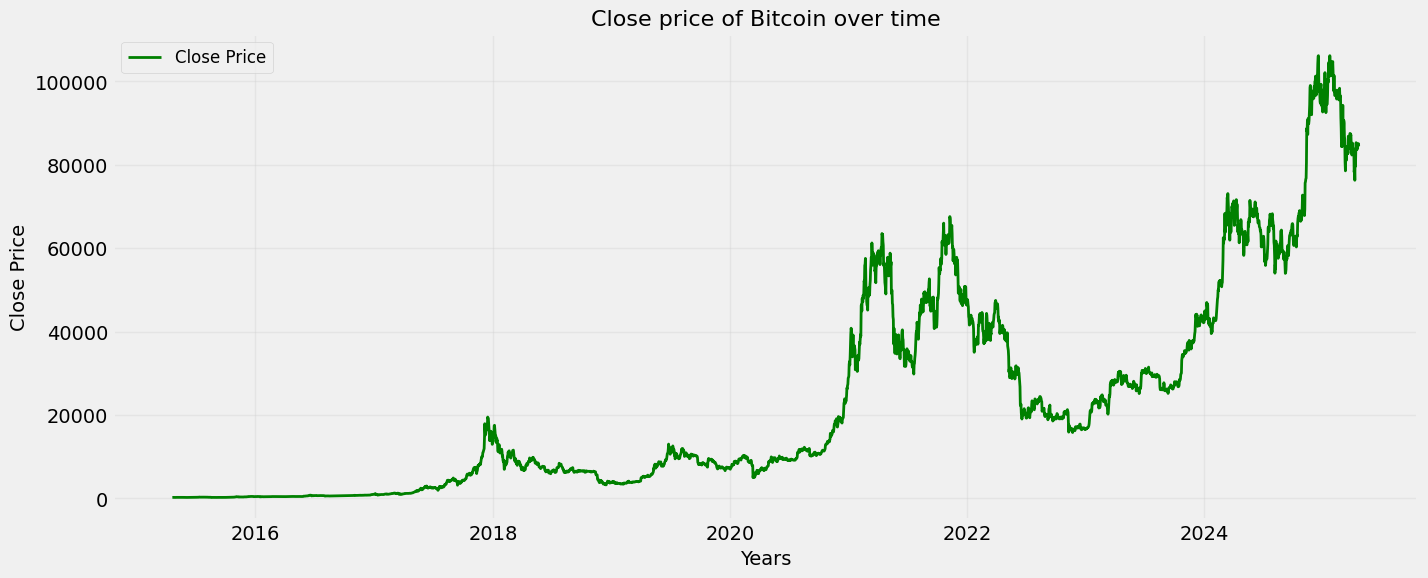

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(crypto_data['BTC-USD'].index, crypto_data['BTC-USD']['Close'], label='Close Price', color='green', linewidth=2)  # Use green for Ethereum
plt.title("Close price of Bitcoin over time", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [8]:
# Keep only cryptos with successful feature addition
CRYPTO_LIST = list(crypto_data.keys())

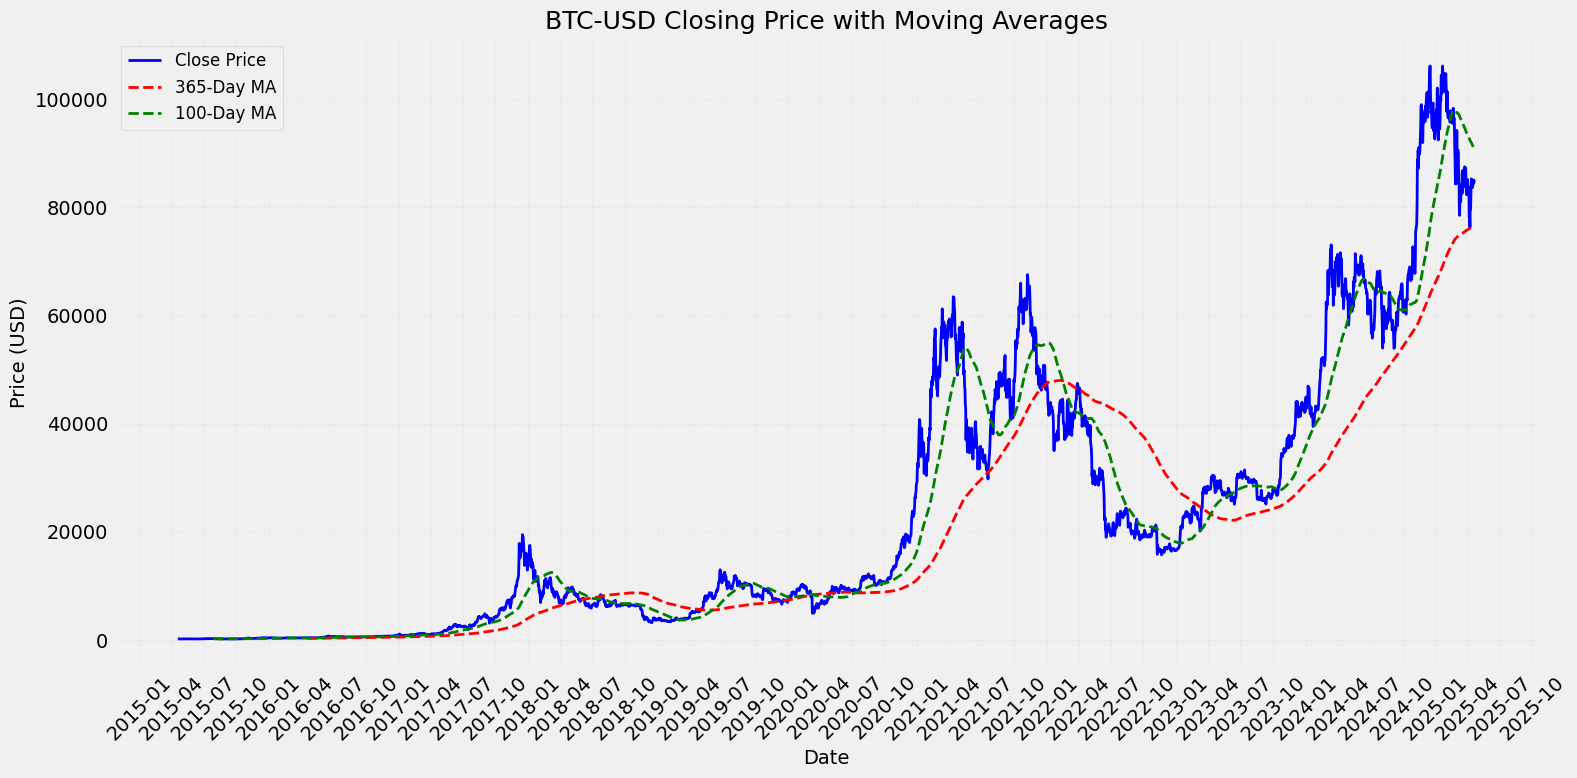

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Select ETH data
eth_df = crypto_data["BTC-USD"].copy()

# Calculate Moving Averages
eth_df['MA_100'] = eth_df['Close'].rolling(window=100).mean()
eth_df['MA_365'] = eth_df['Close'].rolling(window=365).mean()

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(eth_df.index, eth_df['Close'], label='Close Price', color='blue', linewidth=2)
plt.plot(eth_df.index, eth_df['MA_365'], label='365-Day MA', color='red', linestyle='--', linewidth=2)
plt.plot(eth_df.index, eth_df['MA_100'], label='100-Day MA', color='green', linestyle='--', linewidth=2)

# Titles and formatting
plt.title("BTC-USD Closing Price with Moving Averages", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price (USD)", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
plt.legend(fontsize=12)

# Improve x-axis date format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Prepare dataset for multiple cryptocurrencies
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def prepare_multi_crypto_dataset(crypto_data, window_size=100):
    X, y = [], []

    # Combine all close prices for global scaling
    all_close_prices = np.concatenate([data[['Close']].values for data in crypto_data.values()])

    # Fit a single global scaler
    close_scaler = MinMaxScaler(feature_range=(0, 1))
    close_scaler.fit(all_close_prices)

    for crypto, data in crypto_data.items():
        close_prices = data[['Close']].values
        scaled_close_prices = close_scaler.transform(close_prices)

        for i in range(window_size, len(scaled_close_prices)):
            X.append(scaled_close_prices[i - window_size:i])
            y.append(scaled_close_prices[i].flatten()[0])

    return np.array(X), np.array(y), close_scaler


# Example of how to call the function:
X, y,  close_scaler = prepare_multi_crypto_dataset(crypto_data)




In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

In [12]:
# Train-test split
split_idx = int(0.9 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Input shape - X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Input shape - X_test: {X_test.shape}, y_test: {y_test.shape}")

Input shape - X_train: (20837, 100, 1), y_train: (20837,)
Input shape - X_test: (2316, 100, 1), y_test: (2316,)


In [13]:
model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.3),
    LSTM(128),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [ ]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)


print("\nTraining model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10,
    callbacks=[early_stop],
    verbose=1
)


Training model...
Epoch 1/10
 19/652 ━━━━━━━━━━━━━━━━━━━━ 8:08 772ms/step - loss: 0.0030

In [ ]:
  # Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# 1. Save the entire model (recommended)
model.save("crypto_lstm_final.keras")  # .keras is the new recommended format

# 2. Save weights (use the exact required extension)
model.save_weights("crypto_lstm.weights.h5")  # Note the .weights.h5 extension

# 3. Save the scaler
import joblib
joblib.dump(close_scaler, "crypto_scaler.pkl")

# 4. Save feature list (for reference)
import json
with open("feature_columns.json", "w") as f:
    json.dump({
        "features_used": ['Close'],  # Update if using more features
        "window_size": 100,
        "cryptos_supported": CRYPTO_LIST
    }, f)

print("All model assets saved successfully!")

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

def safe_inverse_transform(close_scaler, data):
    dummy = np.zeros((len(data), 1))
    dummy[:, 0] = data.flatten()
    return close_scaler.inverse_transform(dummy)[:, 0]


def evaluate_model(model, X_test, y_test, close_scaler):
    """
    Evaluate model performance with proper inverse scaling

    Parameters:
        model: Trained Keras model
        X_test: Test features
        y_test: Test targets
        scaler: Scaler used for original feature scaling

    Returns:
        y_test_orig: Inverse transformed actual values
        y_pred_orig: Inverse transformed predicted values
    """
    # Generate predictions
    y_pred = model.predict(X_test, verbose=0)

    # Inverse transform using safe method
    y_test_orig = safe_inverse_transform(close_scaler, y_test)
    y_pred_orig = safe_inverse_transform(close_scaler, y_pred)

    # Calculate metrics
    mae = mean_absolute_error(y_test_orig, y_pred_orig)
    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))

    print(f"Test Set Evaluation Results:")
    print(f"MAE: ${mae:.2f}")
    print(f"RMSE: ${rmse:.2f}")

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_orig, label='Actual Prices', color='blue')
    plt.plot(y_pred_orig, label='Predicted Prices', color='red', alpha=0.7)
    plt.title("Actual vs Predicted Prices (Test Set)")
    plt.ylabel("Price (USD)")
    plt.xlabel("Test Samples")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    return y_test_orig, y_pred_orig

# Now run the evaluation
print("Evaluating model performance...")
y_test_orig, y_pred_orig = evaluate_model(model, X_test, y_test, close_scaler)

# Save the evaluation results for future reference
np.save("y_test_orig.npy", y_test_orig)
np.save("y_pred_orig.npy", y_pred_orig)
print("Evaluation complete. Results saved.")

In [ ]:
## **7. Prediction Functions**
def predict_future(model, close_scaler, crypto_data, coin_name, days_to_predict=10, window_size=100):
    data = crypto_data[coin_name]

    # Only use the 'Close' column
    last_close = data[['Close']].tail(window_size)
    scaled_data = close_scaler.transform(last_close)

    predictions = []
    input_seq = scaled_data.reshape(1, window_size, 1)  # Shape: (1, 100, 1)

    for _ in range(days_to_predict):
        pred = model.predict(input_seq)[0][0]
        predictions.append(pred)

        # Update input sequence with the new predicted value
        input_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)

    # Inverse transform to get actual price values
    pred_array = np.array(predictions).reshape(-1, 1)
    actual_predictions = close_scaler.inverse_transform(pred_array).flatten()

    return actual_predictions


# Now predict for BTC-USD
future_predictions = predict_future(model, close_scaler, crypto_data, "BTC-USD")
print("BTC-USD next 10 days prediction:")
print(future_predictions)


In [ ]:
def plot_single_crypto_prediction(future_predictions, crypto_name="Crypto"):
    """
    Plots predicted future close prices for a single cryptocurrency.

    Parameters:
    - future_predictions (array-like): Predicted prices for the next N days.
    - crypto_name (str): Name of the cryptocurrency for the title.
    """
    future_predictions = np.array(future_predictions).flatten()

    plt.figure(figsize=(15, 6))
    plt.plot(range(1, len(future_predictions)+1), future_predictions, marker="o",
             label='Predicted Future Prices', color='purple', linewidth=2)

    for i, val in enumerate(future_predictions):
        plt.text(i + 1, val, f'{val:.2f}', fontsize=10, ha='center', va='bottom', color='black')

    plt.title(f"Future Close Prices for Next {len(future_predictions)} Days - {crypto_name}", fontsize=16)
    plt.xlabel("Day Ahead", fontsize=14)
    plt.ylabel("Close Price (USD)", fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=12)
    plt.show()


In [ ]:
# Example: Predict for BTC-USD and visualize
btc_predictions = predict_future(model, close_scaler, crypto_data, "BNB-USD", days_to_predict=10)
plot_single_crypto_prediction(btc_predictions, crypto_name="BNB-USD")


In [ ]:
def plot_crypto_comparison(model, close_scaler, crypto_data, cryptos, days=10):
    plt.figure(figsize=(14, 7))

    for crypto in cryptos:
        if crypto in crypto_data:
            preds = predict_future(model, close_scaler, crypto_data, crypto, days)
            plt.plot(range(1, days + 1), preds, marker='o', label=crypto)

    plt.title(f'Price Predictions (Next {days} Days)')
    plt.xlabel('Days Ahead')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Compare top 3 cryptos
plot_crypto_comparison(model, close_scaler, crypto_data, ['BTC-USD', 'ETH-USD', 'BNB-USD'])
